<font size="3">Компания "Мегалайн" предлагает своим клиентам два типа тарифного плана Смарт и Ультра. Для корректировки рекламного бюджета, коммерческий департамент хочет понять, какой тариф приносит больше денег. Имеем
данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats as st
from IPython.display import display

# Получим данные в отдельные таблицы

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')


#Вывод заголовков наших основных датафреймов
def display_heads():
    return display ( 
    '--------------------',
    '-----ЗВОНКИ-----',
    '--------------------',
    calls.head(),
    '--------------------',
    '-----ИНТЕРНЕТ-----',
    '--------------------',
    internet.head(),
    '--------------------',
    '-----СООБЩЕНИЯ-----',
    '--------------------',
    messages.head(),
    '--------------------',
    '-----ТАРИФЫ-----',
    '--------------------',
    tariffs.head(),
    '--------------------',
    '-----ПОЛЬЗОВАТЕЛИ-----',
    '--------------------',
    users.head()
)

In [2]:
display_heads()

'--------------------'

'-----ЗВОНКИ-----'

'--------------------'

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


'--------------------'

'-----ИНТЕРНЕТ-----'

'--------------------'

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


'--------------------'

'-----СООБЩЕНИЯ-----'

'--------------------'

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


'--------------------'

'-----ТАРИФЫ-----'

'--------------------'

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'--------------------'

'-----ПОЛЬЗОВАТЕЛИ-----'

'--------------------'

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Да, так пожалуй лаконичнее)


In [3]:
# КОД РЕВЬЮВЕРА

def heads():

    all_dfs = {'Пользователи': users, 'Звонки': calls, 'Сообщения': messages} # и т.д., собираем все датафреймы в одну общую переменную

    # далее по каждому датафрейму из all_dfs пробегаемся и выводим то, что требуется

    for df_key in all_dfs.keys():

        print('\033[1m' + df_key + '\033[0m')
        display(all_dfs[df_key].head())
        print(all_dfs[df_key].info())
        print(all_dfs[df_key].describe())
        print('')

In [4]:
#Удалим лишний столбец unnamed в датасете internet

internet.drop(['Unnamed: 0'], axis=1, inplace=True)
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
internet['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132,
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143,
       1144, 1145, 1146, 1147, 1148, 1149, 1150, 11

In [6]:
print('Кол-во уникальных пользователей:', len(users['user_id'].unique())) #len(users)
print('Кол-во сообщений:', len(messages))
print("Кол-во звонков:", len(calls))
print('Кол-во интернет-сессий:', len(internet))

Кол-во уникальных пользователей: 500
Кол-во сообщений: 123036
Кол-во звонков: 202607
Кол-во интернет-сессий: 149396


Видим в таблице **users** есть 462 пропуска в столбце прекращения тарифа `churn_date` - оставим их, так как пользователь мог пользоваться тарифом на момент выгрузки данных. Пока оставим как есть, если понадобится приведём к типу date. А вот дату регистрации **reg_date** уже можно привести к типу **date**

In [7]:
print('Информация по пользователям')
print()
users.info()

Информация по пользователям

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
#Приводим к типу даты нужные столбцы
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

В последующих таблиах признаки **_date** приведём к соответсвующему типу (date)

In [9]:
print('Информация по звонкам')
print()
calls.info()

Информация по звонкам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [10]:
calls['call_date'] = pd.to_datetime(calls['call_date'])


In [11]:
print('Информация по сообщениям')
print()
messages.info()

Информация по сообщениям

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [13]:
print('Информация о интернет-сессиях')
print()
internet.info()

Информация о интернет-сессиях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [14]:
internet['session_date'] = pd.to_datetime(internet['session_date'])


In [15]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [16]:
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [17]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [18]:
# КОД РЕВЬЮВЕРА

calls['duration'] = np.ceil(calls['duration']).astype('int')
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [19]:
#Выделим месяцы в наших таблицах для последующих манипуляций

internet['month'] = internet['session_date'].dt.month
messages['month'] = messages['message_date'].dt.month
calls['month'] = calls['call_date'].dt.month

#Создадим сводные таблицы по данным iternet messages calls
#Количесвто звонков и потраченных минут для каждого пользователя
grouped_calls = calls.groupby(['user_id', 'month']) \
    .agg({'duration':['count', 'sum']})
    
#Кол-во потраченных Мб тарифа для каждого пользователя
grouped_internet = internet.groupby(['user_id', 'month']) \
    .agg({'mb_used':'sum'}) 

#Кол-во отправленных сообщений для каждого пользователя
grouped_messages = messages.groupby(['user_id', 'month']) \
    .agg({'id':'count'})

In [20]:
#Убирам мультииндекс
df_grouped_calls = pd.DataFrame(grouped_calls).reset_index()
df_grouped_internet = pd.DataFrame(grouped_internet).reset_index()

#Переимунуем столбец для понимания
df_grouped_messages = pd.DataFrame(grouped_messages).reset_index().rename(columns={"id": "msg_count"})
#Приведём в порядок колонки в таблице df_grouped_calls

df_grouped_calls.set_axis(['user_id', 'month', 'calls_count', 'duration_per_month'], axis='columns', inplace=True)

In [21]:
#Сформируем общую таблицу из сгруппированных данных
first_merged = df_grouped_calls.merge(df_grouped_internet, on=['user_id', 'month'], how='outer')
second_merged = first_merged.merge(df_grouped_messages, on=['user_id', 'month'], how='outer')

#Тут будет храниться общая таблица
final_data = users.join(second_merged.set_index('user_id'), on='user_id', how='left')




Наведём порядок в общей таблице. Почистим, приведём к нужному типу

In [22]:
final_data['duration_per_month'] = final_data['duration_per_month'].fillna(0)
final_data['mb_used'] = final_data['mb_used'].fillna(0)
final_data['msg_count'] = final_data['msg_count'].fillna(0)
final_data['month'] = final_data['month'].fillna(0)
final_data['calls_count'] = final_data['calls_count'].fillna(0)

final_data['month'] = final_data['month'].astype(int)
#final_data['duration_per_month'] = np.ceil(final_data['duration_per_month']).astype('int')
#final_data['mb_used'] = np.ceil(final_data['mb_used']).astype(int, errors='ignore')
final_data['msg_count'] = final_data['msg_count'].astype(int, errors='ignore')
final_data['calls_count'] = final_data['calls_count'].astype(int)

final_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,duration_per_month,mb_used,msg_count
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159.0,2256.0,22
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172.0,23257.0,60
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340.0,14016.0,75
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408.0,14070.0,81
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466.0,14581.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41,247.0,20604.0,42
499,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,70.0,1848.0,11
499,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68,449.0,17809.0,48
499,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74,612.0,17984.0,59


Text(0.5, 1.0, 'Длительность разговора')

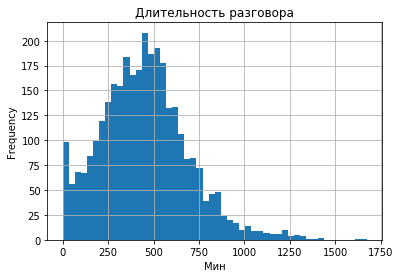

In [23]:
final_data['duration_per_month'].hist(bins=50)
plt.xlabel('Мин')
plt.ylabel('Frequency')
plt.title('Длительность разговора')

 В теории нулевые звонки должны обозначать пропущенные звонки. Можно попробовать заполнить средним значением.

Text(0.5, 1.0, 'Длительность разговора')

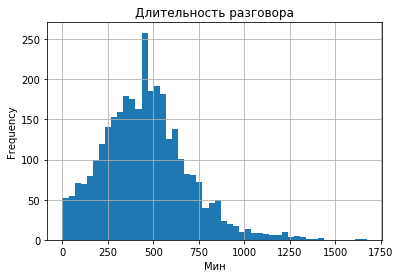

In [24]:
final_data['duration_per_month'] = final_data['duration_per_month'].replace({0:int(final_data['duration_per_month'].median())})

#Проверим как сработало наше заполнение
final_data['duration_per_month'].hist(bins=50)
plt.xlabel('Мин')
plt.ylabel('Frequency')
plt.title('Длительность разговора')


Также присутствуют нулевые значения

Text(0.5, 1.0, 'Интернет')

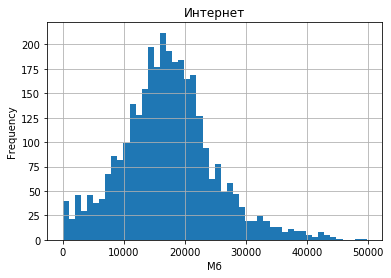

In [25]:
final_data['mb_used'].hist(bins=50)
#Как видим также имеются нулевые значения, которые следует обработать.

plt.xlabel('Мб')
plt.ylabel('Frequency')
plt.title('Интернет')

Text(0.5, 1.0, 'Интернет')

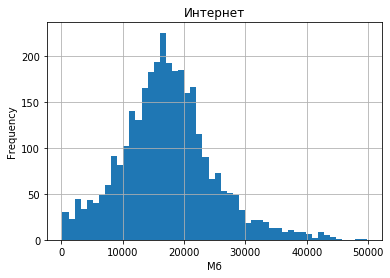

In [26]:
final_data['mb_used'] = final_data['mb_used'].replace({0:int(final_data['mb_used'].median())})

#Контроль
final_data['mb_used'].hist(bins=50)
plt.xlabel('Мб')
plt.ylabel('Frequency')
plt.title('Интернет')



    
В целом хороший подсчет выручку, но я бы сделал чуть по другому:
    
* вычитал бы не из лимита, а из фактического ежемесячного объема: это бы избавило меня от необходимости применять abs, т.е. мне достаточно было просто обнулить отрицательные значения и все, тк положительная разница означала бы перерасход
    
    
* при подсчете выручки за интернет я бы поделил разницу в мб на 1024 и округлил с помощью ceil, тем самым подсчитав объем перерасхода в гб и например если клиент вышел за лимит на 1.3 гб, то ему дадут 2гб (это бы избавило меня от нужды цену за гб делить на 1024)
    
    
* ранее я говорил, что необязательно подтягивать инфу по тарифам в основной датафрейм, тк это приводит к избыточности, таким образом я бы сделал как то так:
</div>

Хотел попробовать твой вариант через apply, но почему-то ошибка вылетала с индексом). Решил не тратить время и оставил всё как было


<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
По дефолту merge использует inner соединение, тут оптимальнее left

`P.s. вообще мне все же кажется, что подтягивать сами цены не очень то и нужно, это приводит к избыточности датафрейма. Мы вполне можем брать значения из самого датафрейма тарифов`
    
</div>

In [27]:
tariffs.rename({"tariff_name":'tariff'}, axis='columns', inplace=True)
final_data.rename({"tariff_name":'tariff'}, axis='columns', inplace=True)

In [28]:
#Делаем подсчёт выручки
final_data = final_data.merge(tariffs, on='tariff', how='left')
final_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month                    3216 non-null int64
calls_count              3216 non-null int64
duration_per_month       3216 non-null float64
mb_used                  3216 non-null float64
msg_count                3216 non-null int64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minut

In [29]:
#Убираем лишние колонки после слияния
cols = [col for col in final_data.columns if not col.endswith(('_y', '_x'))]
final_data = final_data[cols]

final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
age                      3216 non-null int64
churn_date               189 non-null datetime64[ns]
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null datetime64[ns]
tariff                   3216 non-null object
month                    3216 non-null int64
calls_count              3216 non-null int64
duration_per_month       3216 non-null float64
mb_used                  3216 non-null float64
msg_count                3216 non-null int64
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minut

In [30]:
#Если пользователю понадобилось больше заявленного пакета, то значения в столбце будут меньше 0
final_data['mb_over_consumed'] = final_data['mb_per_month_included'] - final_data['mb_used']
#Занулим значения больше 0 для подсчёта общей стоимости и посчитаем абсолютное значение
final_data.loc[final_data['mb_over_consumed'] > 0, 'mb_over_consumed'] = 0
final_data['mb_over_consumed'] = abs(final_data['mb_over_consumed'])

#Делаем аналогичные вычисления по тем, что были выше
final_data['min_over_consumed'] = final_data['minutes_included'] - final_data['duration_per_month']
final_data.loc[final_data['min_over_consumed']>0, 'min_over_consumed'] = 0
final_data['min_over_consumed'] = abs(final_data['min_over_consumed'])

final_data['msg_over_consumed'] = final_data['messages_included'] - final_data['msg_count']
final_data.loc[final_data['msg_over_consumed']>0, 'msg_over_consumed'] = 0
final_data['msg_over_consumed'] = abs(final_data['msg_over_consumed'])

#Считаем сверхтариф
final_data['overpay_remainder'] = (final_data['rub_per_minute'] * final_data['min_over_consumed'] + \
    final_data['rub_per_message'] * final_data['msg_over_consumed'] + \
    (final_data['rub_per_gb'] / 1024) * final_data['mb_over_consumed']) \
    .astype(int)


#Итоговая сумма за месяц и приведём к типу int для экономии
final_data['total_monthly_fee'] = (final_data['overpay_remainder'] + final_data['rub_monthly_fee']).astype(int)
final_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,mb_over_consumed,min_over_consumed,msg_over_consumed,overpay_remainder,total_monthly_fee
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,...,3000,1950,150,1,1,0.0,0.0,0,0,1950
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,...,3000,1950,150,1,1,0.0,0.0,0,0,1950
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,...,3000,1950,150,1,1,0.0,0.0,0,0,1950
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,...,3000,1950,150,1,1,0.0,0.0,0,0,1950
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,...,3000,1950,150,1,1,0.0,0.0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,41,...,500,550,200,3,3,5244.0,0.0,0,1024,1574
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,9,...,500,550,200,3,3,0.0,0.0,0,0,550
3213,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,68,...,500,550,200,3,3,2449.0,0.0,0,478,1028
3214,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,74,...,500,550,200,3,3,2624.0,112.0,9,875,1425


# Шаг 3. Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [31]:
#Делаем срезы для каждого типа тарифа

data_smart = final_data.query('tariff=="smart"')
data_ultra = final_data.query('tariff=="ultra"')

# Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?

#duration_per_month  msg_count  mb_used 

Построим графики распределений для пользователей тарифа Смарт

<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Пожалуйста <b>оформи все графики ниже</b>, это важно. Подпиши оси, заголовки.
 
    
</div>

Text(0.5, 1.0, 'Интренет трафик')

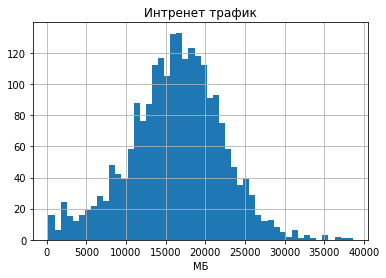

In [32]:
data_smart['mb_used'].hist(bins=50)
plt.xlabel('МБ')
plt.title('Интренет трафик')

На графике распределения boxplot - видно что границы усов находятся в приблизительном интервале от 2500 мб до 30000мб

Text(0.5, 1.0, 'Интернет трафик')

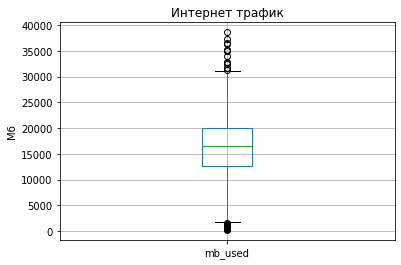

In [33]:
data_smart.boxplot('mb_used')
plt.ylabel('Мб')
plt.title('Интернет трафик')


Видим, что Смарт явно выходит за рамки лимитов
    
</div>

Глянем на сообщения. Тут пользователи укладываются до 100 сообщений в месяц

Text(0.5, 0, 'Кол-во')

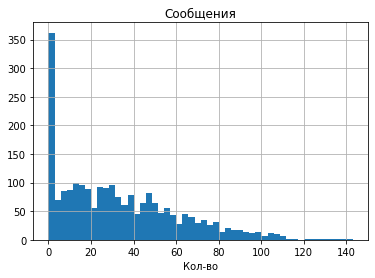

In [34]:
data_smart['msg_count'].hist(bins=50)
plt.title('Сообщения')
plt.xlabel('Кол-во')

Text(0, 0.5, 'Кол-во')

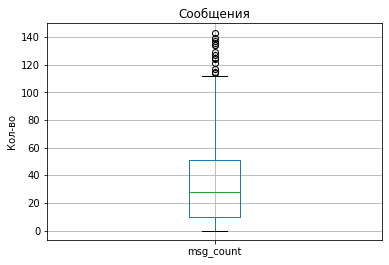

In [35]:
data_smart.boxplot('msg_count')
plt.title('Сообщения')
plt.ylabel('Кол-во')


    
По сообщениям также есть перерасход


Посмторим звонки

Text(0.5, 0, 'Мин')

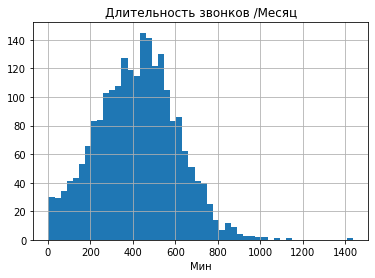

In [36]:
data_smart['duration_per_month'].hist(bins=50)
plt.title('Длительность звонков /Месяц')
plt.xlabel('Мин')


От 0 до 850 меясяц

Text(0, 0.5, 'Мин')

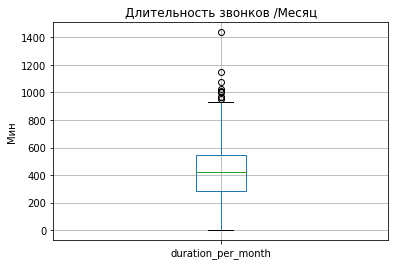

In [37]:
data_smart.boxplot('duration_per_month')
plt.title('Длительность звонков /Месяц')
plt.ylabel('Мин')


  
По минутам клиенты Смарта также выходят за лимит тарифа
    


In [38]:


#Посчитаем нужные статистики по ключевым параметрам тарифа смарт
mb_used_mean = data_smart['mb_used'].mean()
mb_used_var = np.var(data_smart['mb_used'])
mb_used_std = np.sqrt(mb_used_var)

msg_count_mean = data_smart['msg_count'].mean()
msg_count_var = np.var(data_smart['msg_count'])
msg_count_std = np.sqrt(msg_count_var)

duration_per_month_mean = data_smart['duration_per_month'].mean()
duration_per_month_var = np.var(data_smart['duration_per_month'])
duration_per_month_std = np.sqrt(duration_per_month_var)


print('Статистики для тарифа Смарт /месяц')
print('----------------------------------')
print(f'Среднее кол-во трафика {"%.2f" % mb_used_mean} Мб')
print('Дисперсия для трафика:', "%.2f" %mb_used_var)
print('Стандартное отклонение:', "%.2f" %mb_used_std)
print('----------------------------------')
print(f'Среднее кол-во Сообщений {"%.2f" % msg_count_mean}')
print('Дисперсия для сообщений:', "%.2f" %msg_count_var)
print('Стандартное отклонение:', "%.2f" %msg_count_std)
print('----------------------------------')
print(f'Среднее кол-во минут разговора {"%.2f" % duration_per_month_mean}')
print('Дисперсия:', "%.2f" %duration_per_month_var)
print('Стандартное отклонение:', "%.2f" %duration_per_month_std)





Статистики для тарифа Смарт /месяц
----------------------------------
Среднее кол-во трафика 16244.73 Мб
Дисперсия для трафика: 34279188.03
Стандартное отклонение: 5854.84
----------------------------------
Среднее кол-во Сообщений 33.37
Дисперсия для сообщений: 796.60
Стандартное отклонение: 28.22
----------------------------------
Среднее кол-во минут разговора 419.54
Дисперсия: 35560.19
Стандартное отклонение: 188.57


### Посмотрим на тариф Ультра

Text(0.5, 1.0, 'Интернет-трафик')

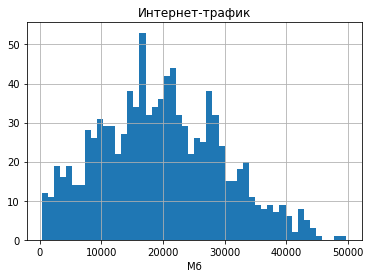

In [39]:
#Интернет-трафик
data_ultra['mb_used'].hist(bins=50)
plt.xlabel('Мб')
plt.title('Интернет-трафик')

Text(0.5, 1.0, 'Интернет-трафик')

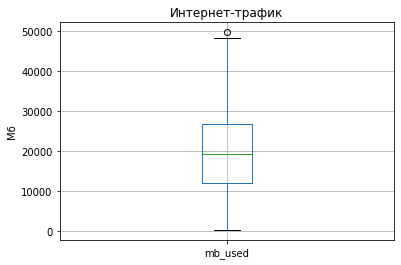

In [40]:
data_ultra.boxplot('mb_used')
plt.ylabel('Мб')
plt.title('Интернет-трафик')

Text(0.5, 0, 'Мин')

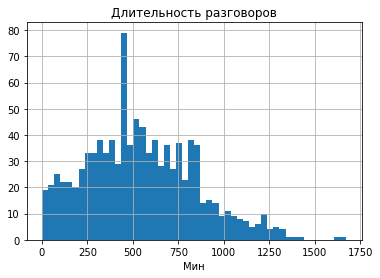

In [41]:
#Длительность разговора
data_ultra['duration_per_month'].hist(bins=50)
plt.title('Длительность разговоров')
plt.xlabel('Мин')

Text(0, 0.5, 'Мин')

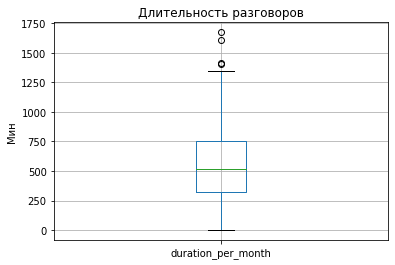

In [42]:

data_ultra.boxplot('duration_per_month')
plt.title('Длительность разговоров')
plt.ylabel('Мин')

Text(0.5, 0, 'Кол-во')

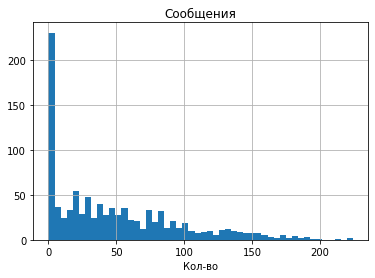

In [43]:
data_ultra['msg_count'].hist(bins=50)
plt.title('Сообщения')
plt.xlabel('Кол-во')

Text(0, 0.5, 'Кол-во')

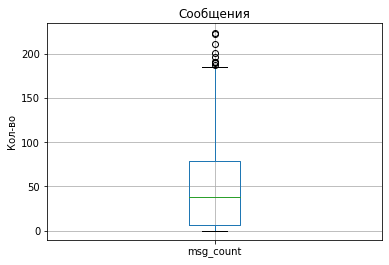

In [44]:
data_ultra.boxplot('msg_count')
plt.title('Сообщения')
plt.ylabel('Кол-во')

mb_used - 0 - 45k
dur_per_m - 0 - 1300
msg - 0 - 155


Примечательно, что тариф Ультра находится в рамках тарифа, разве что по интернету небольшой перерасход, по остальным же услугам явный недобор до лимитов 


In [45]:


mb_used_mean = data_ultra['mb_used'].mean()
mb_used_var = np.var(data_ultra['mb_used'])
mb_used_std = np.sqrt(mb_used_var)

msg_count_mean = data_ultra['msg_count'].mean()
msg_count_var = np.var(data_ultra['msg_count'])
msg_count_std = np.sqrt(msg_count_var)

duration_per_month_mean = data_ultra['duration_per_month'].mean()
duration_per_month_var = np.var(data_ultra['duration_per_month'])
duration_per_month_std = np.sqrt(duration_per_month_var)


print('Статистики для тарифа Ультра /месяц')
print('----------------------------------')
print(f'Среднее кол-во трафика {"%.2f" % mb_used_mean} Мб')
print('Дисперсия для трафика:', "%.2f" %mb_used_var)
print('Стандартное отклонение:', "%.2f" %mb_used_std)
print('----------------------------------')
print(f'Среднее кол-во Сообщений {"%.2f" % msg_count_mean}')
print('Дисперсия для сообщений:', "%.2f" %msg_count_var)
print('Стандартное отклонение:', "%.2f" %msg_count_std)
print('----------------------------------')
print(f'Среднее кол-во минут разговора {"%.2f" % duration_per_month_mean}')
print('Дисперсия:', "%.2f" %duration_per_month_var)
print('Стандартное отклонение:', "%.2f" %duration_per_month_std)


Статистики для тарифа Ультра /месяц
----------------------------------
Среднее кол-во трафика 19673.57 Мб
Дисперсия для трафика: 97535154.13
Стандартное отклонение: 9875.99
----------------------------------
Среднее кол-во Сообщений 49.31
Дисперсия для сообщений: 2283.10
Стандартное отклонение: 47.78
----------------------------------
Среднее кол-во минут разговора 543.61
Дисперсия: 89968.76
Стандартное отклонение: 299.95


Попытаемся провести сравнительный анализ тарифов ультра и Смарт. Первым делом будем смотреть на то, кому хватает лимитов разных тарифов.

In [46]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [47]:
data_smart_limited = data_smart[data_smart['total_monthly_fee'] == 550]
data_smart_over = data_smart[data_smart['total_monthly_fee'] > 550]
print(f'{ "%.2f"%(len(data_smart_over) / len(data_smart) * 100)} % пользователей тарифа Смарт не хватает лимитированного пакета')

74.80 % пользователей тарифа Смарт не хватает лимитированного пакета


In [48]:
#Посмотрим как обстоят дела с тарифом ультра

data_ultra_limited = data_ultra[data_ultra['total_monthly_fee'] == 1950]
data_ultra_over = data_ultra[data_ultra['total_monthly_fee'] > 1950]
print(f'{ "%.2f"%(len(data_ultra_over) / len(data_ultra) * 100)} % пользователей тарифа Ультра не хватает лимитированного пакета')



13.59 % пользователей тарифа Ультра не хватает лимитированного пакета


In [ ]:


# предположим мы хотим посмотреть анализ услуги, что нам нужно: табличка со статистиками \ распределение \ график среднего расхода в месяц

import plotly.express as px

def analysis(df, usluga):
    
    # статистики
    pivot = df.pivot_table(index = 'tariff', values = usluga, aggfunc = ['mean', 'var', 'std'])
    print('Статистики по ', usluga)
    display(pivot)
    
    # гистграмма
    fig = px.histogram(df, x = usluga, color = 'tariff', marginal = 'box', title = 'Распределение '+usluga)
    fig.show()
    
    # средний расход в месяцц
    fig = px.line(df.pivot_table(index = ['tariff', 'month'], values = usluga, aggfunc = 'mean').reset_index(), x = 'month', y = usluga, color = 'tariff', title = 'Средний расход в месяц '+usluga)
    fig.show()
    
# опробуем функцию на тех же мб

analysis(final_data, 'mb_used')

In [ ]:
analysis(final_data, 'msg_count')

In [ ]:
analysis(final_data, 'duration_per_month')

# Вывод

 После подсчёта долей пользователей разных тарифов можно сделать вывод что, 73% Пользователей тарифа смарт не хватает лимитированного пакета услуг, т.к месячная стоимость выходит больше запланированной. А для пользователей тарифа Ультра мы наблюдаем обратную ситуаию доля пользователей, которым не хватает тарифа 13%.
Судя по графикам и распределениям можно сказать, что пользователи тарифа Ультра потребляют вариативнее и больше услуг, чем другие. Самые очевидные это звонки и Интернет.    
    
    

In [52]:
data_ultra.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff', 'month', 'calls_count', 'duration_per_month',
       'mb_used', 'msg_count', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'mb_over_consumed', 'min_over_consumed',
       'msg_over_consumed', 'overpay_remainder', 'total_monthly_fee'],
      dtype='object')

In [53]:
print("Тариф Ультра:", data_ultra['total_monthly_fee'].mean())
print('Тариф Смарт:', data_smart['total_monthly_fee'].mean())

Тариф Ультра: 2060.350912778905
Тариф Смарт: 1233.1713004484304



Средняя выручка по Ультре выше



Text(0.5, 0, 'Руб')

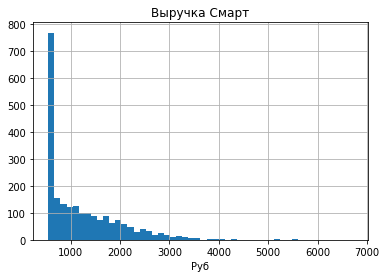

In [54]:
# Построим распределение по выручке для Разных тарифов

data_smart['total_monthly_fee'].hist(bins=50)
plt.title('Выручка Смарт')
plt.xlabel('Руб')

Основой ценовой диапозон наглядно укладывается до 3000руб/месяц, а дальше уже что-то напоминает лишний хвост, но для компании он вовсе не лишний, так как приносит хороший доход

In [55]:
#Глянем на основные статистики
data_smart['total_monthly_fee'].describe()

count    2230.000000
mean     1233.171300
std       787.219163
min       550.000000
25%       550.000000
50%       959.000000
75%      1667.500000
max      6711.000000
Name: total_monthly_fee, dtype: float64

Text(0, 0.5, 'Цена')

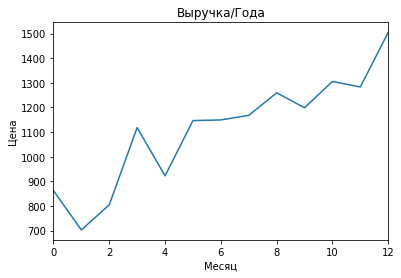

In [56]:
#Построим линейный график для изучения выручки на протяжении года

grouped_smart_fee_by_month = data_smart.groupby('month')['total_monthly_fee'].mean().plot(kind='line')
plt.xlabel('Месяц')
plt.title('Выручка/Года')
plt.ylabel('Цена')



Цена довольно стремительно растёт на протяжение всего года

Text(0.5, 0, 'Руб')

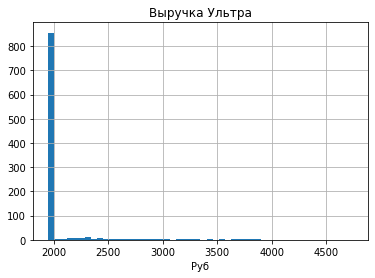

In [57]:
#Выручка тарифа Ультра

data_ultra['total_monthly_fee'].hist(bins=50)
plt.title('Выручка Ультра')
plt.xlabel('Руб')

In [58]:
#Глянем на основные статистики
data_ultra['total_monthly_fee'].describe()

count     986.000000
mean     2060.350913
std       356.023906
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.000000
Name: total_monthly_fee, dtype: float64

Здесь наблюдаем устойчивость нашей выручки в сторону лимита, т.к всего лишь 13% пользователей потребляют больше 

Text(0, 0.5, 'Цена')

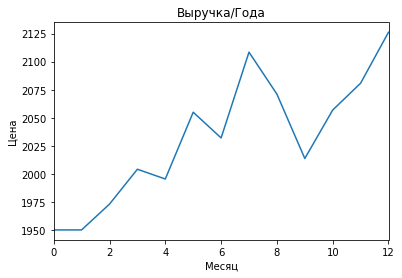

In [59]:
#Изучим временной график
grouped_ultra_fee_by_month = data_ultra.groupby('month')['total_monthly_fee'].mean().plot(kind='line')
plt.xlabel('Месяц')
plt.title('Выручка/Года')
plt.ylabel('Цена')

Наблюдается рост с своеоразным темпом, а именно скачками 4-9мес, а потом резкий подъём

In [60]:
#Посчитаем какой тариф приносит нам суммарно больше денег
sum_ultra = data_ultra['total_monthly_fee'].sum()
sum_smart = data_smart['total_monthly_fee'].sum()

# sum_smart = data['total_monthly_fee']
print('Выручка Ультра за период:', sum_ultra)
print('Выручка Смарт за период:', sum_smart)

Выручка Ультра за период: 2031506
Выручка Смарт за период: 2749972


In [61]:
data_ultra['total_monthly_fee'].describe()

count     986.000000
mean     2060.350913
std       356.023906
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4743.000000
Name: total_monthly_fee, dtype: float64

In [62]:
data_smart['total_monthly_fee'].describe()

count    2230.000000
mean     1233.171300
std       787.219163
min       550.000000
25%       550.000000
50%       959.000000
75%      1667.500000
max      6711.000000
Name: total_monthly_fee, dtype: float64

In [63]:
np.var(data_smart['total_monthly_fee'])

619436.1123601922

In [64]:
np.var(data_ultra['total_monthly_fee'])

126624.46915231083

Как видим , тариф Смарт опережает по годовой выручки тариф Ультра

# Вывод

После проведения анализа выручки заключим, что хоть тариф Ультра более вариативен в плане использования - расширенный пакет услуг итд, всё же большая прибыль выручается с тарифа Смарт, т.к у него шире распределение , а значит есть достаточно много людей (73%), которые выходят за рамки лимита и делают выгодную выручку для компании, на 670т.р в год больше, чем тариф Ультра





    
* Смарт действительно суммарно принес больше денег, клиенты постоянно выходят за лимиты + их куда больше Ультры

Однако!

* не смотря на это выручка по тарифу Смарт более вариативна, т.е. не такая стабильная как у Ультры

* клиентов тарифа Ультра раза в 2 меньше Смарта, но при этом они в среднем генерируют куда большую выручку (среднюю), более стабильно и в пересчете на 1 клиента выручка с 1 уникального клиента ультры очевидно выше, нежели по Смарту, т.е. он прибыльнее так скажем
    
Таким образом я бы сделал упор на Ультру, но вопрос сложны, тк как «выгоден для кого??» Пользователя, или компании? Я все же считаю, что компании, поэтому оптимальнее на мой взгляд продвигать Ультру, тк он более прибыльный


# Проверка гипотез

Попытаемся применить гипотезу о равенстве средних двух генеральных совокупностей, чтобы понять сильно ли отличима выручка пользователей тарифа Смарт от пользователей тарифа Ультра

Гипотеза **H0**: Средняя выручка от пользователей тарифа Ультра и Смарт равна,<br>
Гипотеза **H1**: Средняя выручка не равна

In [65]:
#Проверим дисперсии для дальнейшей настойки парметра

ultra_var = np.var(data_ultra['total_monthly_fee'])
smart_var = np.var(data_smart['total_monthly_fee'])

print('Ultra var-', ultra_var)
print('Smart var-', smart_var)

Ultra var- 126624.46915231083
Smart var- 619436.1123601922



Дисперсия Смарт явно больше, поэтому для проведения теста передадим параметру equal_var значение False

In [66]:
sample_ultra = data_ultra['total_monthly_fee']
sample_smart = data_smart['total_monthly_fee']

alpha = .05 #критический уровень стат. значимости
results = st.ttest_ind(sample_ultra, sample_smart, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем") 

p-value: 2.82176545678121e-296
Отвергаем нулевую гипотезу



Т.к тестом было отвергнута нулевая гипотеза- предполагаем, что выручки различны


Видим, что получить такие или еще большие различия случайно можно с крайне маленькой вероятностью, т.е. они вероятно неслучайны, таким образом Но гипотеза отвергается, между выручкой тарифов имееются статистически значимые различия



Гипотеза **H0**: Средняя выручка пользователей Москвы и пользователей других городов равны,<br>
Гипотеза **H1**: Средняя выручка не равна

In [67]:
moscow_sample_var = np.var(final_data.query('city=="Москва"')['total_monthly_fee'])
outside_moscow_sample_var = np.var(final_data.query('city!="Москва"')['total_monthly_fee'])

print('moscow var-', moscow_sample_var)
print('outside moscow var-', outside_moscow_sample_var)

moscow var- 546237.2279030647
outside moscow var- 629534.8802457992


In [68]:

moscow_sample = final_data.query('city=="Москва"')['total_monthly_fee']
outside_moscow_sample = final_data.query('city!="Москва"')['total_monthly_fee']

alpha = .05 #критический уровень стат. значимости
results = st.ttest_ind(moscow_sample, outside_moscow_sample, equal_var=False)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value: 0.4578081040894523
Не получилось отвергнуть нулевую гипотезу


Тест показал, что средние между выборками по клиентам из Москвы и других городов близки. Следовательно есть основания утвердить,что региональный фактор не повлияет на увелечение выручки.


Исходя из результатов стат.теста мы не обладаем достаточными основаниями для отвержения гипотезы Но, выручки по Москве и регионам различны, но с вероятностью 47% получить различия можно чисто случайно. Это слишком высокая вероятность случайности, чтобы делать вывод о значимых различиях. Таким образом гипотезу Но не отвергаем, делаем вывод, что выручка по Москве и регионам статистически значимо не различается



## Общий вывод



<font size="3"> В ходе анализа тарифов Смарт и Ультра мы применяли множество методов анализа данных, а именно предобработку, когда объединяли данные из таблиц, в которых хранилась информация о пользователях и их действиях в рамках тарифа. Приводили столбцы к требующей форме, группирвали данные для анализа и считали выручку. Визуализировали данные графиками и распределениями, что привело нас к нахождению интересных особенностей. Например, выяснилось что 73% пользователям тарифа Смарт не хватает лимитированного пакета услуг, а также их количество превосходит кол-во пользвотелей тарифа Ультра, засчёт чего при подсчёте годовая выручка Смарт превзошла своего товарища на 670т.р. Но с другой стороны, потребительская активность пользователей Ультра выше, судя по временным графикам использования сообщений, звонков и интернета, а также выше и среднее значение выручки. Для проверки построенных гипотез о средних выручках: смарт-ультра, Москва-Россия, мы попытались применить статистические тесты для подсчёта p-value с критическим уровнем статистической значимости alpha = 0.05, и добились интересных результатов. Несмотря на то, что выручка пользователей тарифов Смарт выше, чем Ультра - стат.тест опровергнул ,что средние этих выборок могут быть равны, и мы условились на том, что тариф Ультра в среднем приносит больше Смарт'а. Обратная ситуация получилась ,когда провели тест для выручки , сравнивая пользователей Москвы и др.регионов и тут оказалось, что Выручка одинакова, будь там или там. 